**Group : TP1**

**Cocoma, David**

**Dejean, Maxime**

## Advice
### Work
- **Read the whole subject before starting**
- Search for the documentation (Google) before asking a teacher
- The work will be evaluated based on this notebook:
    - Answer questions in the notebook.
    - Insert your code here and execute it so that the output stays displayed for the teacher.

### ChatGPT
- You can use ChatGPT ONLY to answer specific questions, get introductory explanations on machine learning libraries, get example codes. Be aware that there is no guaranty in the answer of ChatGPT (even with the paying licence).
- Do not use ChatGPT to work in your stead ! The goal is for you to learn the manipulation of machine learning basic methods yourself. Teachers are used to look at student's works and ChatGPT is not good to fake it.
=> In case of a doubt of ChatGPT use (or plagiarism between groups), the students will be summoned and evaluated on an oral presentation.

# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [77]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [78]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [79]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [80]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [81]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



We can use a more readable and visual way as follows:

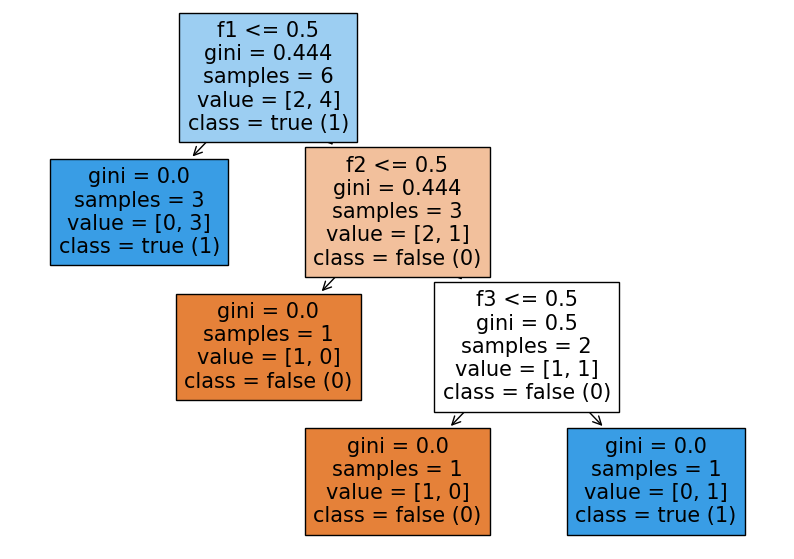

In [82]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
        feature_names= ("f1","f2" , "f3", "f4"),
        class_names= ("false (0)", "true (1)" ), 
        filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. Be quick, the constructed dataset does NOT need to make sense.


|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



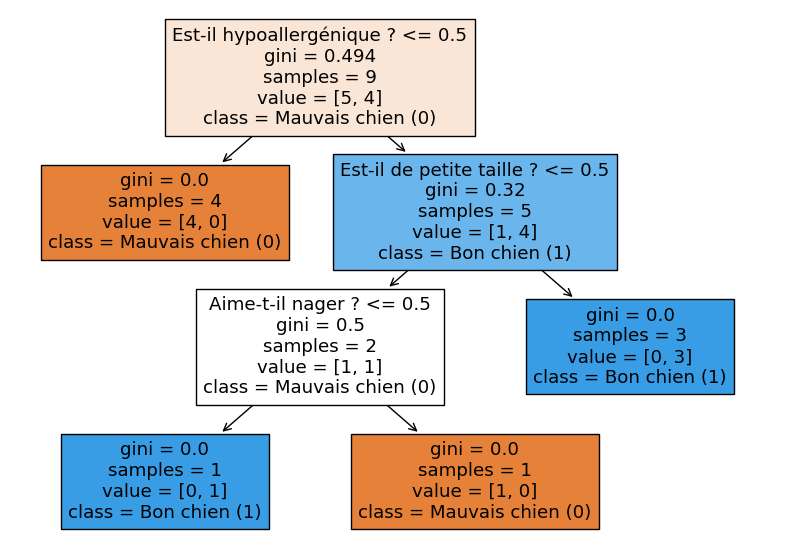

In [83]:
# X is the training set 
# Each example in X has 4 binary features
XE = [
 [0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 1, 1, 0, 1, 1]
]


# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
YE = [1, 1, 0, 0, 1, 0, 1, 0, 0]

clfE = tree.DecisionTreeClassifier()
clfE = clf.fit(XE, YE)
clfE.predict([[1, 0, 1, 0, 1, 1, 0, 1],
[0, 1, 0, 1, 1, 0, 1, 1],
[1, 1, 0, 0, 0, 1, 1, 1],
[0, 0, 1, 1, 1, 1, 0, 1],
[1, 0, 1, 1, 0, 0, 1, 0],
[0, 1, 0, 1, 1, 0, 0, 1],
[1, 1, 1, 0, 0, 1, 0, 1],
[0, 1, 0, 1, 0, 1, 1, 0],
[1, 0, 1, 0, 1, 0, 0, 1],
[1, 1, 0, 1, 0, 0, 1, 0]
])
text_representation = tree.export_text(clfE)
print(text_representation)
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clfE, 
        feature_names = ("Aboie-t-il souvent ?", 
                         "Est-il de petite taille ?",
                         "Aime-t-il jouer avec d'autres chiens ?",
                         "A-t-il un pelage long ?",
                         "Est-il hypoallergénique ?",
                         "Est-il agressif envers les inconnus ?",
                         "Aime-t-il nager ?",
                         "Est-il une race de travail ?"),
        class_names= ("Mauvais chien (0)", "Bon chien (1)" ), 
        filled=True)

## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset (from Kaggle) :**

Take a moment to think about the following questions 

- What are the features?

The dataset have 28 different columns corresponding to features like age, name, date of birth and various more
- How many examples in the dataset?

it contqins 60800 examples
- What are your expectations regarding the most important features?

probqbly the sex, the recovery supervision and age 
- Propose (informally) a way to reduce the dataset

We can delete the columns of ID's, names, middle names and last names, because they are highly variable and have no relation hith the behaviore of the inmate and they are assigned alleatory, also we can remove the cases where they are all classified in one group like assesment reason and language 

- There many ways to binarize the dataset. How do you propose to do so?

We can set ranges with criteria of below or above given value 


**Analysing the dataset with machine learning (custom binarized dataset, NOT from Kaggle) :**

Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset [compass.csv](compass.csv)
- The set of tools [utils.py](utils.py)

Load the binary dataset `compass.csv` as follows 

In [84]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

Inspect each of these 4 objects.

- What do they represent? How many features? examples?

Its the way we are organizing the dataset in train examples and train labels, the exaples beeing the entry and the train labels the real ouput for training, the features containts all the labels of clasification, there are 165 features and 5273 examples

- We want to predict recidivism after 2 years, where is this information stored ?

In train labels

In [85]:
print("train_examples:")
print(train_examples)
print(f"Shape of train_examples: {train_examples.shape}")

print("\train_labels:")
print(train_labels)
print(f"Shape of train_labels: {train_labels.shape}")

print("\nfeatures:")
print(features[0])
print(features[1])
print(features[2])
print(f"Number of features: {len(features)}")

print("\nprediction:")
print(prediction)

train_examples:
[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Shape of train_examples: (5273, 165)
	rain_labels:
[1 0 0 ... 1 0 1]
Shape of train_labels: (5273,)

features:
race_African-American
race_Caucasian
gender_Female
Number of features: 165

prediction:
two_year_recid


Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 
- splitter
- max_depth 
- min_samples_leaf 

What do they represent?

- The splitter parameter controls how the decision tree chooses to split the data at each node. It determines which strategy will be used to find the best split, nwe can choose between "best" that chooses the best split at each node based on the feature that maximizes the information gain or using "random" that chooses the split randomly from the features at each node and is useful for controlling the complexity of the model or introducing randomness.
- The max_depth parameter controls the maximum depth (i.e., number of levels) of the decision tree. Limiting the depth helps prevent overfitting, as deeper trees may overfit the data and become too complex, the default value is None and this means the tree will grow until it perfectly fits the training data, unless another stopping criterion is met. Or we can set Setting max_depth to a small value to limit the tree’s complexity.
- The min_samples_leaf specifies the minimum number of samples that must be present in a leaf node of the tree. Increasing this number helps reduce overfitting, as it forces the tree to generalize better by not allowing overly small leaf nodes. Default value: 1 (each leaf node will contain at least one sample).

## EVALUATED PART:

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

Q1: A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics.

In [94]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

mytree1 = tree.DecisionTreeClassifier()
mytree2 = tree.DecisionTreeClassifier(splitter="random",max_depth=15,min_samples_leaf=50)
mytree3 = tree.DecisionTreeClassifier(splitter="best",max_depth=17,min_samples_leaf=40)
mytree4 = tree.DecisionTreeClassifier(splitter="random",max_depth=19,min_samples_leaf=30)
mytree5 = tree.DecisionTreeClassifier(splitter="best",max_depth=18,min_samples_leaf=50)
mytree6 = tree.DecisionTreeClassifier(splitter="random",max_depth=20,min_samples_leaf=60)

Q2: Train a decision tree for each of the previous configurations on the full dataset. Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*. Vizualize the resulting decision trees.

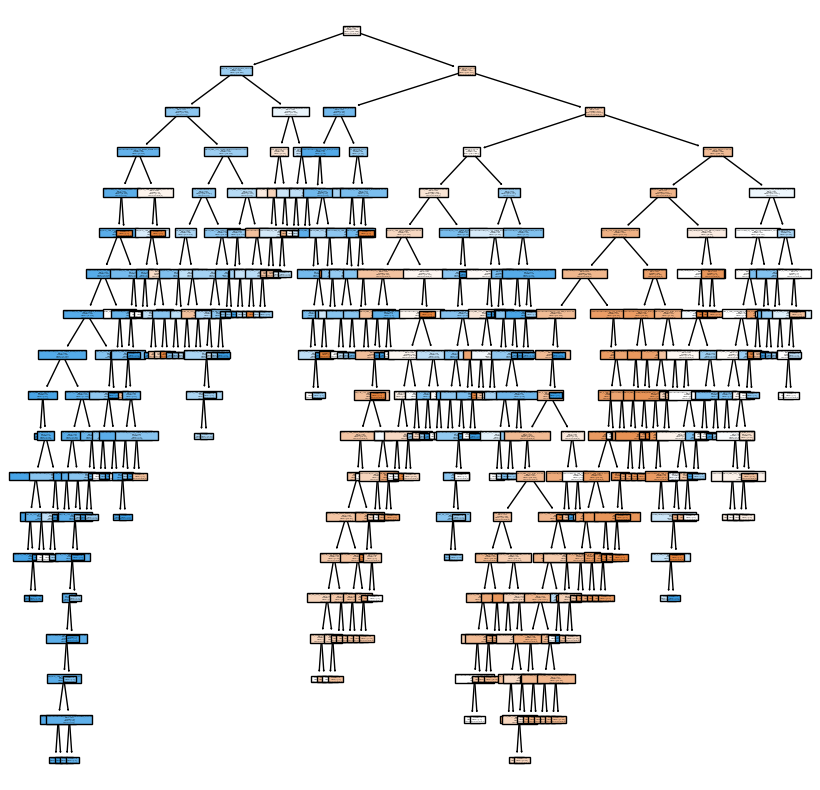

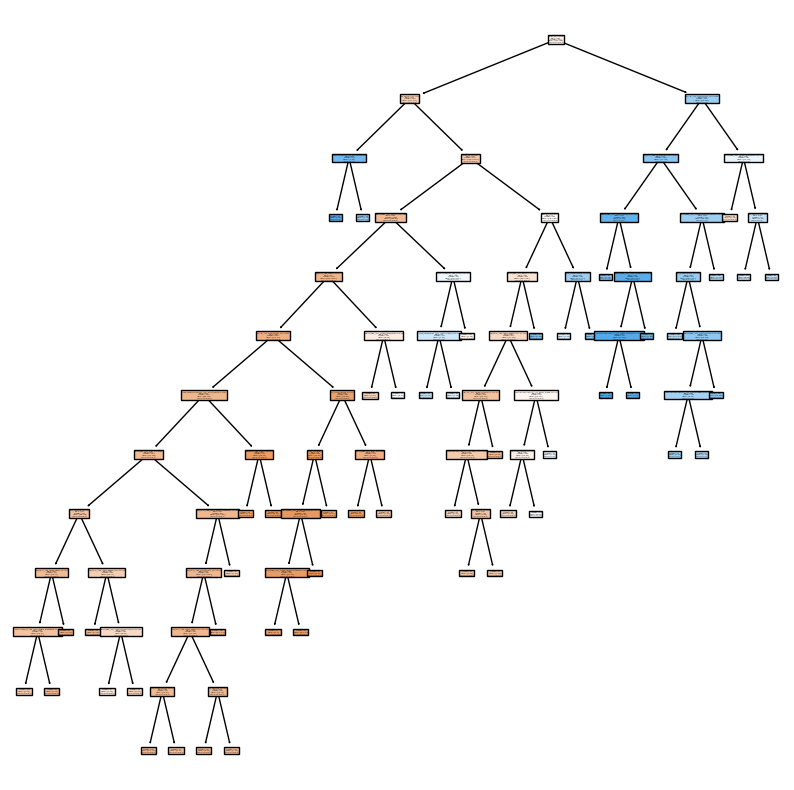

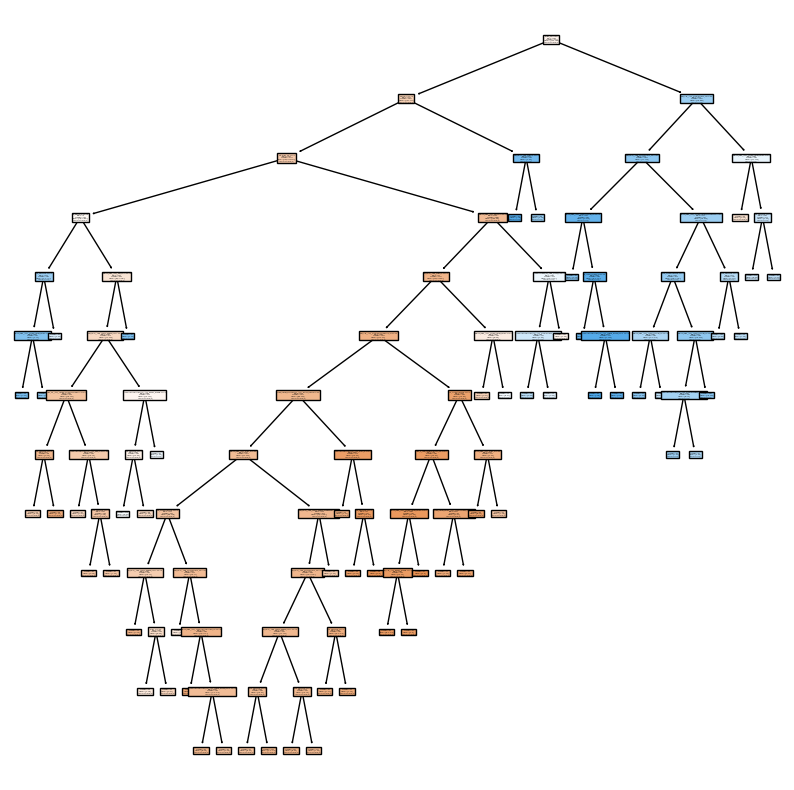

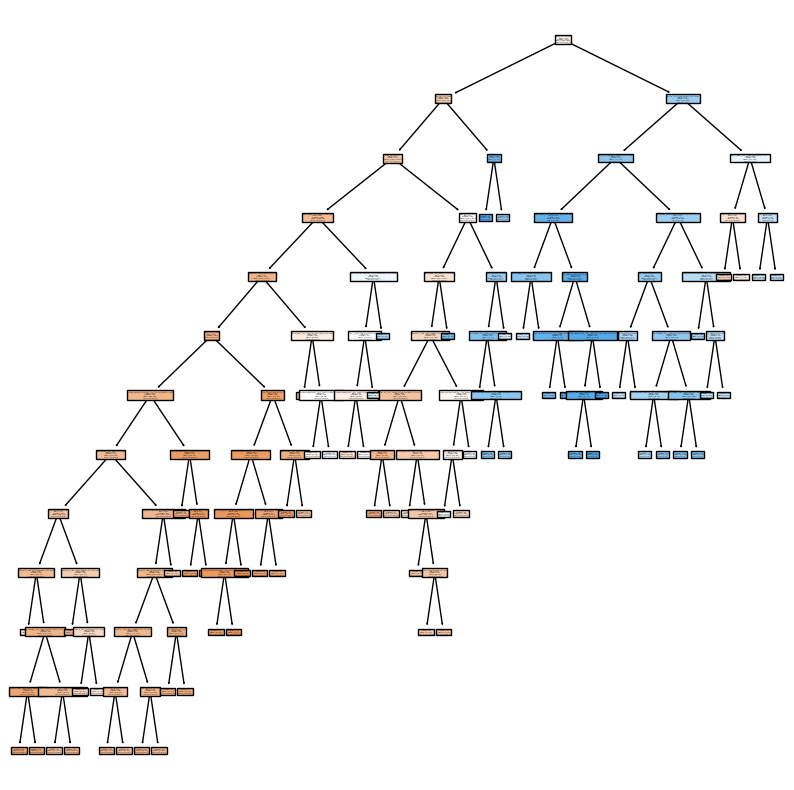

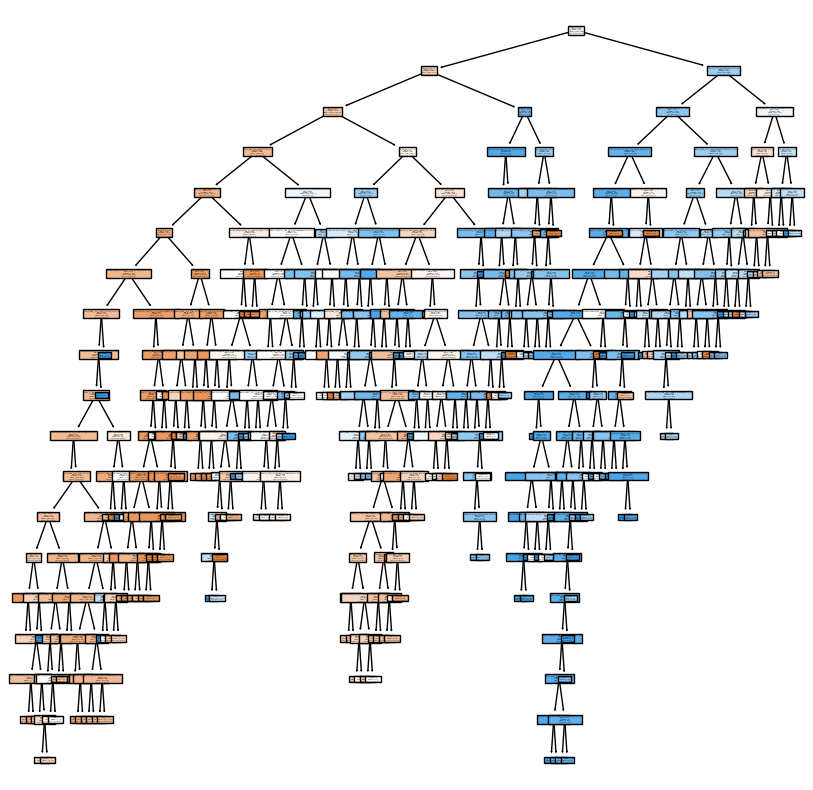

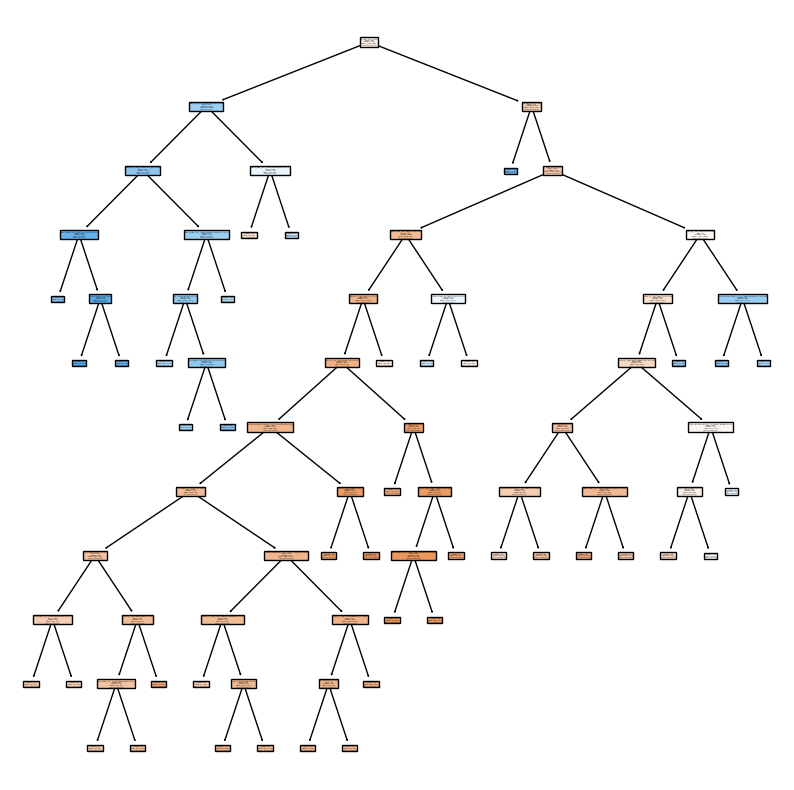

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels,test_size = 0.20)

mytree1 = mytree1.fit(x_train, y_train)
mytree1.predict(x_test)
text_representation = tree.export_text(mytree1)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree1, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

mytree2 = mytree2.fit(x_train, y_train)
mytree2.predict(x_test)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree2, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

mytree3 = mytree3.fit(x_train, y_train)
mytree3.predict(x_test)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree3, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

mytree4 = mytree4.fit(x_train, y_train)
mytree4.predict(x_test)
text_representation = tree.export_text(mytree4)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree4, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

mytree5 = mytree1.fit(x_train, y_train)
mytree5.predict(x_test)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree5, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

mytree6 = mytree6.fit(x_train, y_train)
mytree6.predict(x_test)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(mytree6, 
        feature_names = features,
        class_names = ("Not recid (0)", "Recid (1)" ), 
        filled=True)

Q3: Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different topologies

Q4: Propose an experimental study that shows the transition phase from underfitting to overfitting. Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 

Q5: Construct the confusion matrix on a particular good configuration (after explaining your choice). What are the most important parameters in terms of True/False Positive/Negative Rate?

Q6: Provide an evaluation of the fairness of the model based on the False Positive Rate. The "utils.py" file provides useful functions for this purpose.